In [1]:
from lcapy import *
from numpy import logspace
from numpy import linspace
 

## Q5
The following transfer function is out of control:$\frac{1}{s^2}$

Explain why the system is out of control, and describe what the shape of the step response would be.
Write out the transfer function Q(s) of a system with one negative feedback loop with a feedback transfer function of G(s).
Design the simplest feedback transfer function G(s) to make Q(s) stable.
What are the conditions on the constants of G(s) that will ensure that the system is in control?


In [2]:
H = transfer(1 / (s**2))
H

1 
──
 2
s 

In [3]:
H.poles()

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

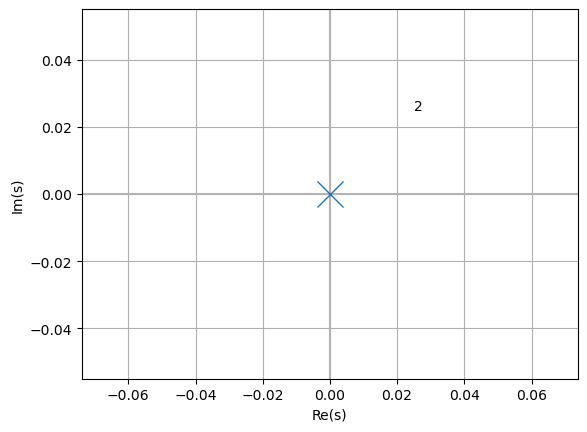

In [4]:
H.plot()

Both poles are zero, so tis systems is a double integrator.

In [5]:
F=H*1/s
ft=F(t)
ft
# The equation is:

 2     
t ⋅u(t)
───────
   2   

You did not have to find the equation, you just had to say integrator, double integrator, or power growth.  

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

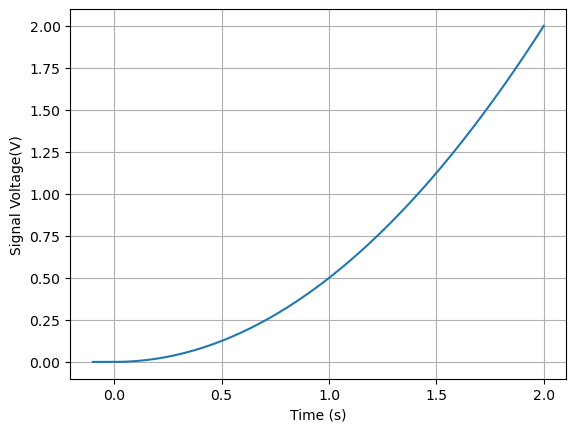

In [6]:
tv = linspace(-.1, 2, 400)
ft.plot(tv,ylabel='Signal Voltage(V)')

We can see the power growth clearly.

Below is the block diagram of Q(s):

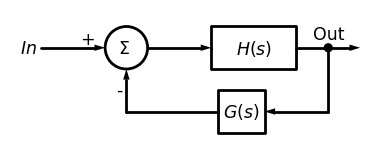

In [7]:
import schemdraw as schem
import schemdraw.elements as e
from schemdraw import dsp 
d = schem.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$G(s)$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw()

In [8]:
from sympy import Symbol
#Keep G a symbol for now.
K1=Symbol('K1')
K2=Symbol('K2')
G = Symbol('G')
N=5
D=s**2
Q=N/(D+G*N)
Q.general()

   5    
────────
       2
5⋅G + s 

We need to create  positive $bs$ and $c$ terms. We need a $K_1s$ term that modifies $5$ into a $bs$ term, and $K_2$ term that modifies $5$ into a $c$ term.

$$G(s)=K_1s+K_2$$


In [9]:
Q=Q.subs(G,K1*s+K2)
Q=Q.expand()
Q

        5         
──────────────────
                 2
5⋅K₁⋅s + 5⋅K₂ + s 

To make $5 K_1s$ positve $K_1>0$.  To make $5 K_2$ positve $K_2>0$


 $K_1=.5$,  $K_2=1$

In [10]:
Q=Q.subs(K1,.5)
Q=Q.subs(K2,1)
Q

     5      
────────────
 2   5⋅s    
s  + ─── + 5
      2     

In [11]:
Q.poles()

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

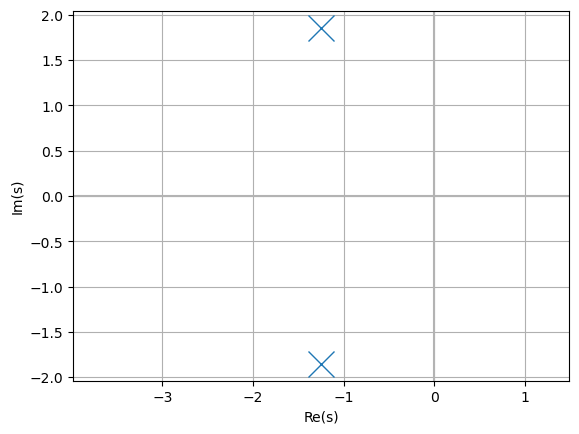

In [12]:
Q.plot()

THe real part of the poles are on the LHP.

In [13]:
Fq=Q*1/s
qt=Fq(t,causal=True)
qt

  ⎛                               -5⋅t                -5⋅t            ⎞     
  ⎜                               ─────               ─────           ⎟     
  ⎜                                 4      ⎛√55⋅t⎞      4      ⎛√55⋅t⎞⎟     
  ⎜                          √55⋅ℯ     ⋅sin⎜─────⎟   ℯ     ⋅cos⎜─────⎟⎟     
  ⎜           1                            ⎝  4  ⎠             ⎝  4  ⎠⎟     
5⋅⎜─────────────────────── - ───────────────────── - ─────────────────⎟⋅u(t)
  ⎜⎛5   √55⋅ⅉ⎞ ⎛5   √55⋅ⅉ⎞             55                    5        ⎟     
  ⎜⎜─ - ─────⎟⋅⎜─ + ─────⎟                                            ⎟     
  ⎝⎝4     4  ⎠ ⎝4     4  ⎠                                            ⎠     

All the terms now have exponential decay.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

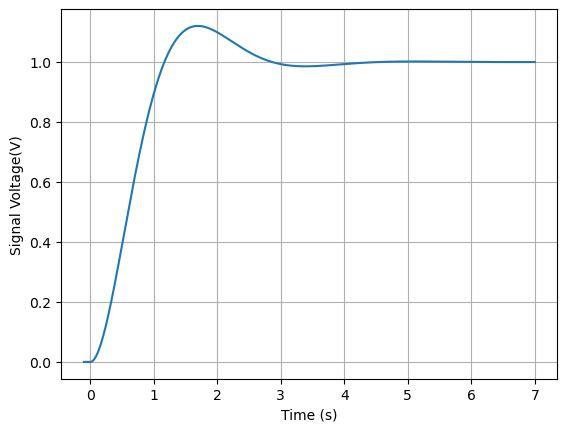

In [14]:
tv = linspace(-.1, 7, 400)
qt.plot(tv,ylabel='Signal Voltage(V)')

This is now the step response of a second order low pass filter.